In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
%matplotlib inline

# Load Data

In [2]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2019-12-11 21:54:36--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

100%[======================================>] 23,101      --.-K/s   in 0.07s   

2019-12-11 21:54:36 (303 KB/s) - ‘loan_train.csv’ saved [23101/23101]



In [3]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [4]:
df.shape

(346, 10)

# Data Pre-processing

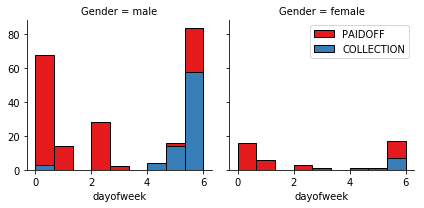

In [5]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

In [8]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


In [9]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

In [10]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


In [11]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

In [73]:
df['education'].replace(to_replace=['High School or Below','college','Bechalor','Master or Above'], value=[0,1,2,3], inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,0,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,2,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,1,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,1,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,1,0,4,1


In [18]:
Feature = df[['Principal','terms','age','education','Gender','weekend']]
Feature.head()

,Principal,terms,age,education,Gender,weekend
0,1000,30,45,0,0,0
1,1000,30,33,2,1,0
2,1000,15,27,1,0,0
3,1000,30,28,1,1,1
4,1000,30,29,1,0,1


In [19]:
X = Feature
X[0:5]

,Principal,terms,age,education,Gender,weekend
0,1000,30,45,0,0,0
1,1000,30,33,2,1,0
2,1000,15,27,1,0,0
3,1000,30,28,1,1,1
4,1000,30,29,1,0,1


In [20]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [21]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DataConversionWarning: Data with input dtype int64, object were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


array([[ 0.51578458,  0.92071769,  2.33152555, -0.99512471, -0.42056004,
        -1.20577805],
       [ 0.51578458,  0.92071769,  0.34170148,  1.83872837,  2.37778177,
        -1.20577805],
       [ 0.51578458, -0.95911111, -0.65321055,  0.42180183, -0.42056004,
        -1.20577805],
       [ 0.51578458,  0.92071769, -0.48739188,  0.42180183,  2.37778177,
         0.82934003],
       [ 0.51578458,  0.92071769, -0.3215732 ,  0.42180183, -0.42056004,
         0.82934003]])

# Classification

# 1. K Nearest Neighbor (KNN)

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.5, random_state=5)
X_train = preprocessing.StandardScaler().fit(X_train).transform(X_train)
X_test = preprocessing.StandardScaler().fit(X_test).transform(X_test)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (173, 6) (173,)
Test set: (173, 6) (173,)


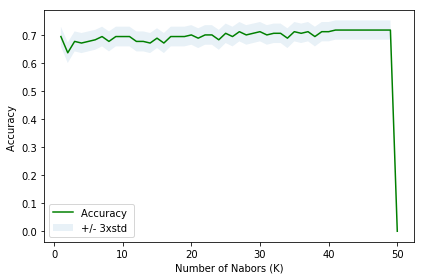

In [25]:
mean_acc=np.zeros(50)
std_acc = np.zeros(50)
for n in range(1,50):
    knnmodel=KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    y_pred=knnmodel.predict(X_test)
    mean_acc[n-1]=metrics.accuracy_score(y_test,y_pred)
    std_acc[n-1]=np.std(y_pred==y_test)/np.sqrt(y_pred.shape[0])
    
plt.plot(range(1,51),mean_acc,'g')
plt.fill_between(range(1,51),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [26]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 0.7167630057803468 with k= 41


# 2. Decision Tree (DT)

In [27]:
!conda install pydotplus

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - pydotplus


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.11.28         |           py36_0         156 KB
    pydotplus-2.0.2            |             py_1          23 KB
    ca-certificates-2019.11.27 |                0         132 KB
    ------------------------------------------------------------
                                           Total:         311 KB

The following NEW packages will be INSTALLED:

    pydotplus:       2.0.2-py_1      

The following packages will be UPDATED:

    ca-certificates: 2019.10.16-0     --> 2019.11.27-0     
    certifi:         2019.9.11-py36_0 --> 2019.11.28-py36_0


certifi-2019.11.28   | 156 KB    | ##################################### | 100% 
pydotplus-2.0.2      | 23 KB     | ########################

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree

In [29]:
dt= DecisionTreeClassifier(criterion="entropy", max_depth = 5)
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

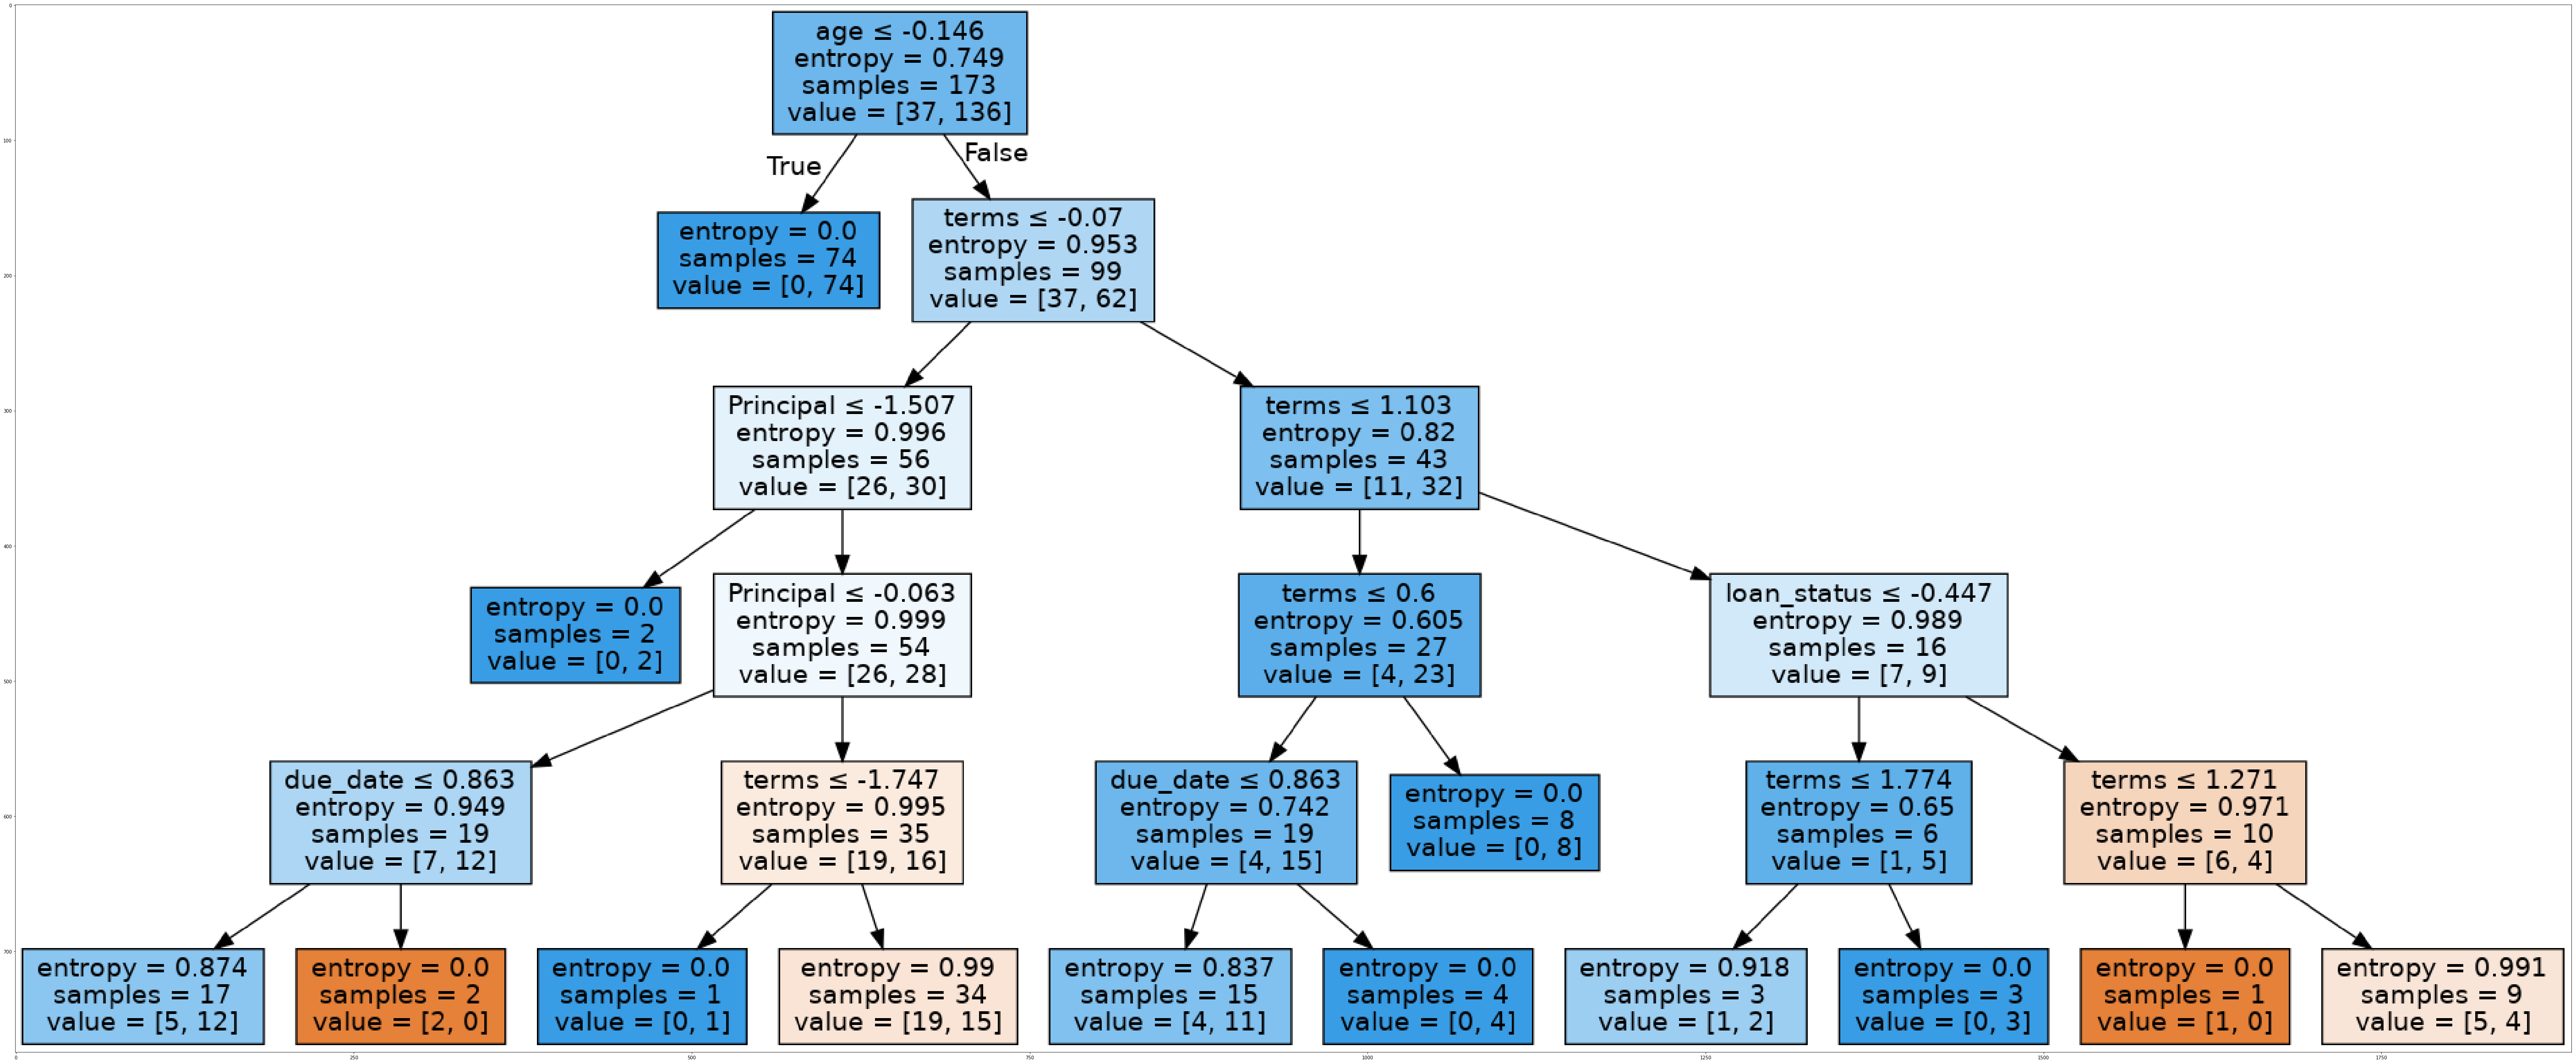

In [35]:
dot_data = StringIO()
filename = "dt.png"
featureNames = df.columns[2: 8]
targetNames = df["loan_status"].unique().tolist()
out=tree.export_graphviz(dt,feature_names= featureNames, out_file=dot_data, filled=True, special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

In [36]:
y_pred=dt.predict(X_test)
TreeAccuracy=metrics.accuracy_score(y_test,y_pred)
TreeAccuracy

0.653179190751445

# 3. Logistic Regression (LR)

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
lr=LogisticRegression(C=0.01,solver='liblinear').fit(X_train,y_train)
lr

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [40]:
y_pred = lr.predict(X_test)
y_pred[0:5]

array(['COLLECTION', 'PAIDOFF', 'PAIDOFF', 'COLLECTION', 'PAIDOFF'],
      dtype=object)

In [41]:
y_pred_prob = lr.predict_proba(X_test)

In [53]:
metrics.accuracy_score(y_test,y_pred)

0.6994219653179191

# 4. Support Vector Machine (SVM)

In [47]:
from sklearn import svm
svm=svm.SVC(kernel='rbf')
svm.fit(X_train, y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [50]:
y_pred = svm.predict(X_test)
y_pred[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'COLLECTION', 'PAIDOFF'],
      dtype=object)

In [52]:
metrics.accuracy_score(y_test,y_pred)

0.6994219653179191

# Evaluation

In [54]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [114]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2019-12-11 23:19:59--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

100%[======================================>] 3,642       --.-K/s   in 0s      

2019-12-11 23:19:59 (261 MB/s) - ‘loan_test.csv’ saved [3642/3642]



In [75]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [76]:
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])

In [77]:
test_df['weekend'] = (test_df['effective_date'].dt.dayofweek).apply(lambda x: 1 if (x>3)  else 0)

In [78]:
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)

In [79]:
test_df['education'].replace(to_replace=['High School or Below','college','Bechalor','Master or Above'], value=[0,1,2,3], inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,0,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,2,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,1,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,1,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,1,0,4,1


In [80]:
test_Feature = df[['Principal','terms','age','education','Gender','weekend']]
test_Feature.head()

,Principal,terms,age,education,Gender,weekend
0,1000,30,45,0,0,0
1,1000,30,33,2,1,0
2,1000,15,27,1,0,0
3,1000,30,28,1,1,1
4,1000,30,29,1,0,1


In [81]:
y_testset = test_df['loan_status'].values

X_testset = test_Feature

X_testset = preprocessing.StandardScaler().fit(X_testset).transform(X_testset)
X_testset[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:5: DataConversionWarning: Data with input dtype int64, object were all converted to float64 by StandardScaler.


array([[ 0.51578458,  0.92071769,  2.33152555, -0.99512471, -0.42056004,
        -1.20577805],
       [ 0.51578458,  0.92071769,  0.34170148,  1.83872837,  2.37778177,
        -1.20577805],
       [ 0.51578458, -0.95911111, -0.65321055,  0.42180183, -0.42056004,
        -1.20577805],
       [ 0.51578458,  0.92071769, -0.48739188,  0.42180183,  2.37778177,
         0.82934003],
       [ 0.51578458,  0.92071769, -0.3215732 ,  0.42180183, -0.42056004,
         0.82934003]])

# 1. Evaluation KNN

In [89]:
y_pred_knn=knnmodel.predict(X_testset)
jacc_knn=jaccard_similarity_score(y_testset,y_pred_knn)
jacc_knn

0.7514450867052023

In [91]:
f1_knn = f1_score(y_testset, y_pred_knn, average='weighted')
f1_knn

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.6448043648295465

In [93]:
logl_knn = 'NA'

# 2. Evaluation DT

In [95]:
y_pred_dt = dt.predict(X_testset)
jacc_dt= jaccard_similarity_score(y_testset, y_pred_knn)
jacc_dt

0.7514450867052023

In [96]:
f1_dt = f1_score(y_testset, y_pred_dt, average='weighted')
f1_dt

0.7422693027451376

In [97]:
logl_dt = 'NA'

# 3. Evaluation LR

In [99]:
y_pred_lr = lr.predict(X_testset)
jacc_lr = jaccard_similarity_score(y_testset, y_pred_lr )
jacc_lr

0.7543352601156069

In [100]:
f1_lr = f1_score(y_testset, y_pred_lr, average='weighted')
f1_lr

0.6997291283105058

In [106]:
y_pred_lr_prob = lr.predict_proba(X_testset)
logl_lr = log_loss(y_testset, y_pred_lr_prob)
logl_lr

0.5814406298059955

# 4. Evaluation SVM

In [103]:
y_pred_svm = svm.predict(X_testset)
jacc_svm = jaccard_similarity_score(y_testset, y_pred_svm)
jacc_svm

0.7456647398843931

In [104]:
f1_svm= f1_score(y_testset, y_pred_svm , average='weighted')
f1_svm

0.6654826349293732

In [107]:
y_pred_svm_prob = svm.predict_proba(X_testset)
logl_svm = svm_loss(y_testset, y_pred_svm_prob)
logl_svm

AttributeError: predict_proba is not available when  probability=False

In [110]:
# predict_proba is not available when  probability=False

logl_svm= 'NA'

# Report

In [111]:
Jaccard = [round(x,2) for x in [jacc_knn, jacc_dt, jacc_svm, jacc_lr]] 
F1_Score = [round(x,2) for x in [f1_knn, f1_dt, f1_svm, f1_lr]]
LogLoss = [logl_knn, logl_dt, logl_svm, round(logl_lr,2)]

In [112]:
z_results = list(zip(Jaccard, F1_Score, LogLoss))

In [113]:
Report = pd.DataFrame(z_results, columns = ['Jaccard' , 'F1-score', 'LogLoss'], index=['KNN', 'Decision Tree', 'SVM', 'LogisticRegression'])
Report

,Jaccard,F1-score,LogLoss
KNN,0.75,0.64,NA
Decision Tree,0.75,0.74,NA
SVM,0.75,0.67,NA
LogisticRegression,0.75,0.70,0.58
